<a href="https://colab.research.google.com/github/Hatcher27/Applied-Data-Science-Capstone/blob/main/Titanic_Survivor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [3]:
titanic_train=pd.read_csv('train.csv')
titanic_test=pd.read_csv('test.csv')

In [4]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_test.shape

(418, 11)

In [6]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_train.shape

(891, 12)

In [8]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

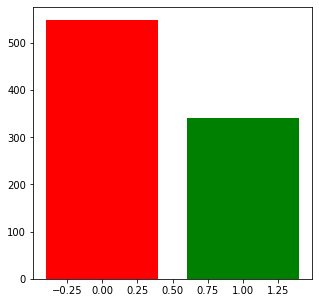

In [9]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=["r","g"])
plt.show()

In [10]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

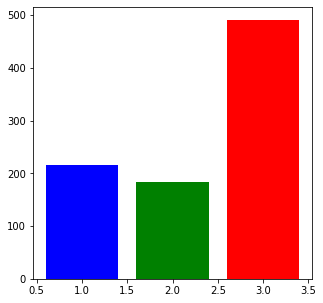

In [11]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=['r','b','g'])
plt.show()

In [12]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

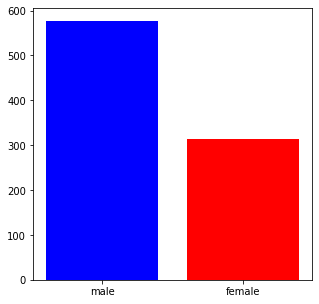

In [13]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color=['b','r'])
plt.show()

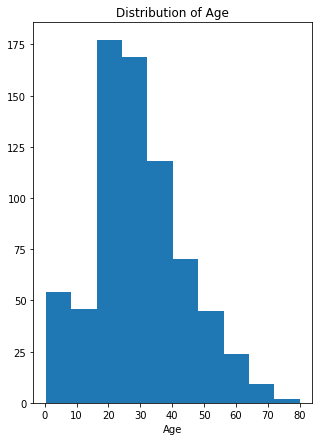

In [14]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

In [15]:
sum(titanic_train['Survived'].isnull())

0

In [16]:
sum(titanic_train['Age'].isnull())

177

In [17]:
titanic_train=titanic_train.dropna()

In [18]:
sum(titanic_train['Survived'].isnull())

0

In [19]:
sum(titanic_train['Age'].isnull())

0

# Training The Model

In [20]:
x_train = titanic_train[['Age']]
y_train = titanic_train[['Survived']]

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtc = DecisionTreeClassifier()

In [23]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

#Predictive Values

In [24]:
sum(titanic_test['Age'].isnull())

86

In [25]:
titanic_test=titanic_test.dropna()

In [26]:
sum(titanic_test['Age'].isnull())

0

In [27]:
x_test=titanic_test[['Age']]

In [28]:
y_pred = dtc.predict(x_test)

In [29]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [30]:
len(y_pred)

87

In [31]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [33]:
# Using DataFrame.insert() to add a column
titanic_test.insert(2,"Survived", [1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1], True)
  
# Observe the result
print(titanic_test)

     PassengerId  Pclass  Survived  \
12           904       1         1   
14           906       1         0   
24           916       1         1   
26           918       1         1   
28           920       1         1   
..           ...     ...       ...   
404         1296       1         1   
405         1297       2         0   
407         1299       1         0   
411         1303       1         0   
414         1306       1         1   

                                                  Name     Sex   Age  SibSp  \
12       Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.0      1   
14   Chaffee, Mrs. Herbert Fuller (Carrie Constance...  female  47.0      1   
24     Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  female  48.0      1   
26                        Ostby, Miss. Helene Ragnhild  female  22.0      0   
28                             Brady, Mr. John Bertram    male  41.0      0   
..                                                 ...     ...   ... 

In [38]:
gender_submission = titanic_test
gender_submission[['PassengerId','Survived']]

,PassengerId,Survived
12,904,1
14,906,0
24,916,1
26,918,1
28,920,1
...,...,...
404,1296,1
405,1297,0
407,1299,0
411,1303,0


In [56]:
filename = 'Titanic_Survival_Prediction.csv'

gender_submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic_Survival_Prediction.csv
